<a href="https://colab.research.google.com/github/erikaminarikova/REFRESH/blob/main/loan_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install pygad

In [ ]:
# import pygad
import numpy as np
import pandas as pd
import statistics
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import image
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, mean_squared_error
from scipy import stats
import time

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/Bondora_LoanData.csv', index_col=0)

In [ ]:
data

,NewCreditCustomer,LoanDate,Age,Gender,Country,AppliedAmount,Interest,LoanDuration,MonthlyPayment,UseOfLoan,...,ExpectedLoss,ProbabilityOfDefault,DefaultDate,PlannedPrincipalPostDefault,PlannedInterestPostDefault,EAD1,EAD2,Rating,Status,NoOfPreviousLoansBeforeLoan
ID,,,,,,,,,,,,,,,,,,,,,
1,0,9/9/2022,27,1.0,1,3189.0,35.48,60,115.34,-1,...,0.106489,0.160200,NaN,NaN,NaN,NaN,NaN,D,Current,1.0
2,0,3/23/2016,53,1.0,1,2125.0,20.97,60,62.05,2,...,0.068500,0.122216,1/14/2020,1251.98,77.68,1251.98,64.07,C,Late,1.0
3,0,5/31/2022,25,0.0,1,531.0,25.27,60,16.67,-1,...,0.068700,0.101800,NaN,NaN,NaN,NaN,NaN,C,Current,8.0
4,0,6/25/2015,50,1.0,1,3000.0,17.12,60,84.75,3,...,0.030800,0.036400,6/2/2016,2658.82,1078.96,2730.84,2370.77,B,Repaid,1.0
5,1,1/19/2016,44,0.0,1,10630.0,13.67,60,268.57,3,...,0.023177,0.041300,12/6/2017,6456.37,1537.37,6723.01,5014.54,A,Repaid,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267071,1,8/17/2015,58,1.0,1,3000.0,21.62,60,88.71,6,...,0.065200,0.077200,NaN,NaN,NaN,NaN,NaN,C,Repaid,0.0
267072,0,6/15/2015,64,0.0,1,1300.0,16.38,48,41.42,6,...,0.025500,0.030100,7/13/2016,1137.39,560.45,1137.39,984.41,A,Repaid,4.0
267073,0,7/13/2022,52,1.0,1,531.0,16.55,60,14.53,-1,...,0.037288,0.054750,NaN,NaN,NaN,NaN,NaN,B,Current,1.0


In [ ]:
# prompt: From data please keep only these columns: IncomeTotal, DebtToIncome, FreeCash, ExistingLiabilities, Age, Education, MaritalStatus, EmploymentStatus, WorkExperience, AppliedAmount, Interest, LoanDuration, UseOfLoan, NoOfPreviousLoansBeforeLoan, ProbabilityOfDefault, Status, Rating

columns_to_keep = ['IncomeTotal', 'DebtToIncome', 'FreeCash', 'ExistingLiabilities', 'Age', 'Education', 'MaritalStatus', 'EmploymentStatus', 'WorkExperience', 'AppliedAmount', 'Interest', 'LoanDuration', 'UseOfLoan', 'NoOfPreviousLoansBeforeLoan', 'ProbabilityOfDefault', 'Status', 'Rating', 'ExpectedLoss']
data = data[columns_to_keep]
data

,IncomeTotal,DebtToIncome,FreeCash,ExistingLiabilities,Age,Education,MaritalStatus,EmploymentStatus,WorkExperience,AppliedAmount,Interest,LoanDuration,UseOfLoan,NoOfPreviousLoansBeforeLoan,ProbabilityOfDefault,Status,Rating,ExpectedLoss
ID,,,,,,,,,,,,,,,,,,
1,900.0,0.00,0.00,0,27,3.0,-1.0,-1.0,NaN,3189.0,35.48,60,-1,1.0,0.160200,Current,D,0.106489
2,354.0,26.29,10.92,8,53,4.0,2.0,6.0,15To25Years,2125.0,20.97,60,2,1.0,0.122216,Late,C,0.068500
3,947.0,0.00,0.00,0,25,1.0,-1.0,-1.0,NaN,531.0,25.27,60,-1,8.0,0.101800,Current,C,0.068700
4,900.0,30.58,78.80,4,50,5.0,2.0,5.0,MoreThan25Years,3000.0,17.12,60,3,1.0,0.036400,Repaid,B,0.030800
5,1200.0,26.71,349.43,7,44,4.0,4.0,5.0,MoreThan25Years,10630.0,13.67,60,3,0.0,0.041300,Repaid,A,0.023177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267071,350.0,25.35,11.29,3,58,3.0,1.0,3.0,MoreThan25Years,3000.0,21.62,60,6,0.0,0.077200,Repaid,C,0.065200
267072,867.0,56.59,116.38,8,64,4.0,1.0,4.0,15To25Years,1300.0,16.38,48,6,4.0,0.030100,Repaid,A,0.025500
267073,400.0,0.00,0.00,0,52,1.0,-1.0,-1.0,NaN,531.0,16.55,60,-1,1.0,0.054750,Current,B,0.037288


In [ ]:
# prompt: I want to remove all rows in data where are one of the columns empty

data.dropna(inplace=True)
data

/tmp/ipython-input-15-1765681685.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,IncomeTotal,DebtToIncome,FreeCash,ExistingLiabilities,Age,Education,MaritalStatus,EmploymentStatus,WorkExperience,AppliedAmount,Interest,LoanDuration,UseOfLoan,NoOfPreviousLoansBeforeLoan,ProbabilityOfDefault,Status,Rating
ID,,,,,,,,,,,,,,,,,
2,354.0,26.29,10.92,8,53,4.0,2.0,6.0,15To25Years,2125.0,20.97,60,2,1.0,0.122216,Late,C
4,900.0,30.58,78.80,4,50,5.0,2.0,5.0,MoreThan25Years,3000.0,17.12,60,3,1.0,0.036400,Repaid,B
5,1200.0,26.71,349.43,7,44,4.0,4.0,5.0,MoreThan25Years,10630.0,13.67,60,3,0.0,0.041300,Repaid,A
7,863.0,7.36,449.47,1,42,2.0,1.0,3.0,5To10Years,1500.0,40.40,60,2,0.0,0.188726,Late,F
8,697.0,36.04,95.81,5,34,4.0,4.0,6.0,5To10Years,1595.0,68.39,48,7,0.0,0.749511,Late,HR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267067,2300.0,9.40,1393.89,3,38,3.0,1.0,3.0,10To15Years,2000.0,33.79,60,6,0.0,0.142712,Late,E
267068,2172.0,69.77,5.51,19,37,4.0,3.0,3.0,15To25Years,7440.0,24.52,60,0,2.0,0.170865,Repaid,D
267070,1550.0,30.13,67.92,7,37,3.0,3.0,3.0,15To25Years,1595.0,64.51,60,7,3.0,0.573979,Repaid,HR


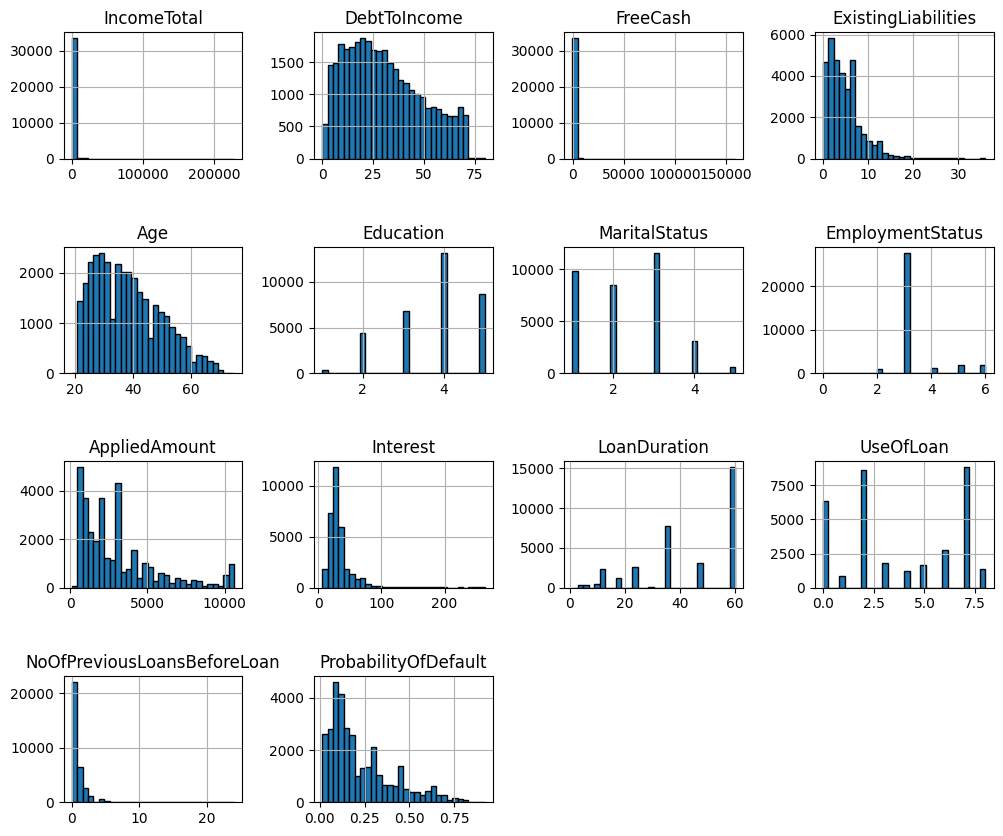

In [ ]:
# Grafical representation of distribution of attributes
data.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

In [ ]:
# prompt: I want to normalize columns Age in this direction: Too young (<25) or very old (>65) can increase risk due to instability or fixed income. Mid-range (~30–55) is usually more stable. around 30-55 as 1 and then 0 if <25 and >65 between 0-1 range

def normalize_age(age):
    if age < 25 or age > 65:
        return 0.0
    elif 30 <= age <= 55:
        return 1.0
    elif 25 <= age < 30:
        # Linear scaling between 0 and 1 for ages 25 to 30
        return (age - 25) / (30 - 25)
    elif 55 < age <= 65:
        # Linear scaling between 1 and 0 for ages 55 to 65
        return 1 - (age - 55) / (65 - 55)
    else:
        return 0.0 # Should not happen with the given ranges

data['Age_Normalized'] = data['Age'].apply(normalize_age)

# Display the first few rows with the new normalized column
print(data[['Age', 'Age_Normalized']].head())


    Age  Age_Normalized
ID                     
2    53             1.0
4    50             1.0
5    44             1.0
7    42             1.0
8    34             1.0


/tmp/ipython-input-20-4121238400.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age_Normalized'] = data['Age'].apply(normalize_age)


In [ ]:
# prompt: Can you filter on MaritalStatus if the value is equal to 0 and -1

data[(data['MaritalStatus'] == 0) | (data['MaritalStatus'] == -1)]

,IncomeTotal,DebtToIncome,FreeCash,ExistingLiabilities,Age,Education,MaritalStatus,EmploymentStatus,WorkExperience,AppliedAmount,Interest,LoanDuration,UseOfLoan,NoOfPreviousLoansBeforeLoan,ProbabilityOfDefault,Status,Rating,Age_Normalized
ID,,,,,,,,,,,,,,,,,,


In [ ]:
# prompt: Can you normalize MaritalStatus 1 as 1 and 5 as 0 and lineary callculate in between

def normalize_marital_status(status):
    if status == 1:
        return 1.0
    elif status == 5:
        return 0.0
    elif status > 1 and status < 5:
        # Linear scaling between 1 and 0 for statuses between 1 and 5
        return 1.0 - (status - 1) / (5 - 1)
    else:
        return 0.0 # For any other status values

data['MaritalStatus_Normalized'] = data['MaritalStatus'].apply(normalize_marital_status)

# Display the first few rows with the new normalized column
print(data[['MaritalStatus', 'MaritalStatus_Normalized']].head())


    MaritalStatus  MaritalStatus_Normalized
ID                                         
2             2.0                      0.75
4             2.0                      0.75
5             4.0                      0.25
7             1.0                      1.00
8             4.0                      0.25


/tmp/ipython-input-22-2935049382.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['MaritalStatus_Normalized'] = data['MaritalStatus'].apply(normalize_marital_status)


In [ ]:
# prompt: I want to normalize emplyment Status as: 1 Unemployed - 0, 2 Partially employed -0.2,  3 Fully employed - 1,  4 Self-employed- 0.6 5 Entrepreneur-0.4, 6 Retiree-0,8

def normalize_employment_status(status):
    if status == 1:
        return 0.0
    elif status == 2:
        return 0.2
    elif status == 3:
        return 1.0
    elif status == 4:
        return 0.6
    elif status == 5:
        return 0.4
    elif status == 6:
        return 0.8
    else:
        return 0.0 # Default for unknown status

data['EmploymentStatus_Normalized'] = data['EmploymentStatus'].apply(normalize_employment_status)

# Display the first few rows with the new normalized column
print(data[['EmploymentStatus', 'EmploymentStatus_Normalized']].head())


    EmploymentStatus  EmploymentStatus_Normalized
ID                                               
2                6.0                          0.8
4                5.0                          0.4
5                5.0                          0.4
7                3.0                          1.0
8                6.0                          0.8


/tmp/ipython-input-23-4251954027.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['EmploymentStatus_Normalized'] = data['EmploymentStatus'].apply(normalize_employment_status)


In [ ]:
# Step 1: Map categories to a numeric scale
experience_mapping = {
    'LessThan2Years': 0,
    '2To5Years': 1,
    '5To10Years': 2,
    '10To15Years': 3,
    '15To25Years': 4,
    'MoreThan25Years': 5
}

# Step 2: Normalize the values to range [0, 1]
max_value = max(experience_mapping.values())
normalized_mapping = {k: v / max_value for k, v in experience_mapping.items()}

# Step 3: Apply mapping
data['WorkExperience_Normalized'] = data['WorkExperience'].map(normalized_mapping)

print(data[['WorkExperience','WorkExperience_Normalized']].head())


     WorkExperience  WorkExperience_Normalized
ID                                            
2       15To25Years                        0.8
4   MoreThan25Years                        1.0
5   MoreThan25Years                        1.0
7        5To10Years                        0.4
8        5To10Years                        0.4


/tmp/ipython-input-26-1886119744.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['WorkExperience_Normalized'] = data['WorkExperience'].map(normalized_mapping)


In [ ]:
# prompt: Can you filter on UseOfLoan if the value is equal to 0 and -1

data[(data['UseOfLoan'] == -1)]

,IncomeTotal,DebtToIncome,FreeCash,ExistingLiabilities,Age,Education,MaritalStatus,EmploymentStatus,WorkExperience,AppliedAmount,...,UseOfLoan,NoOfPreviousLoansBeforeLoan,ProbabilityOfDefault,Status,Rating,Age_Normalized,MaritalStatus_Normalized,EmploymentStatus_Normalized,normalizedWorkExperience,WorkExperience_Normalized
ID,,,,,,,,,,,,,,,,,,,,,


In [ ]:
use_of_loan_risk_score = {
    1: 2,    # Real estate
    2: 2,    # Home improvement
    4: 3,    # Education
    8: 3,    # Health
    0: 4,    # Loan consolidation
    6: 4,    # Vehicle
    3: 5,    # Business
    5: 6,    # Travel
    7: 6,    # Other
    101: 5,
    102: 3,
    103: 2,
    104: 4,
    105: 4,
    106: 5,
    107: 6,
    108: 2,
    109: 6,
    110: 6
}

# Step 1: Find min and max risk scores
risk_values = list(use_of_loan_risk_score.values())
min_val = 1
max_val = 6

# Step 2: Normalize
normalized_risk_score = {
    k: round((max_val - v) / (max_val - min_val), 3) for k, v in use_of_loan_risk_score.items()
}

# Step 3: Apply mapping
data['UseOfLoan_Normalized'] = data['UseOfLoan'].map(normalized_risk_score)

print(data[['UseOfLoan','UseOfLoan_Normalized']].head())


    UseOfLoan  UseOfLoan_Normalized
ID                                 
2           2                   0.8
4           3                   0.2
5           3                   0.2
7           2                   0.8
8           7                   0.0


/tmp/ipython-input-29-4207763952.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['UseOfLoan_Normalized'] = data['UseOfLoan'].map(normalized_risk_score)


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
columns_to_keep = [
    'IncomeTotal', 'DebtToIncome', 'FreeCash', 'ExistingLiabilities',
    'AppliedAmount', 'Interest', 'LoanDuration',
    'NoOfPreviousLoansBeforeLoan', 'ProbabilityOfDefault', 'ExpectedLoss'
]

# Normalize each column and add a new "_Normalized" version
for col in columns_to_keep:
    min_val = data[col].min()
    max_val = data[col].max()
    data[f"{col}_Normalized"] = (data[col] - min_val) / (max_val - min_val)


In [ ]:
data


,IncomeTotal,DebtToIncome,FreeCash,ExistingLiabilities,Age,Education,MaritalStatus,EmploymentStatus,WorkExperience,AppliedAmount,...,IncomeTotal_Normalized,DebtToIncome_Normalized,FreeCash_Normalized,ExistingLiabilities_Normalized,AppliedAmount_Normalized,Interest_Normalized,LoanDuration_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,ProbabilityOfDefault_Normalized,ExpectedLoss_Normalized
ID,,,,,,,,,,,,,,,,,,,,,
1,900.0,0.00,0.00,0,27,3.0,-1.0,-1.0,NaN,3189.0,...,0.000889,0.000000,0.014477,0.000,0.199460,0.127635,0.495798,0.013514,0.161097,0.120138
2,354.0,26.29,10.92,8,53,4.0,2.0,6.0,15To25Years,2125.0,...,0.000350,0.132764,0.014545,0.200,0.132702,0.072319,0.495798,0.013514,0.122901,0.077280
3,947.0,0.00,0.00,0,25,1.0,-1.0,-1.0,NaN,531.0,...,0.000936,0.000000,0.014477,0.000,0.032689,0.088712,0.495798,0.108108,0.102370,0.077505
4,900.0,30.58,78.80,4,50,5.0,2.0,5.0,MoreThan25Years,3000.0,...,0.000889,0.154429,0.014966,0.100,0.187602,0.057642,0.495798,0.013514,0.036604,0.034748
5,1200.0,26.71,349.43,7,44,4.0,4.0,5.0,MoreThan25Years,10630.0,...,0.001186,0.134885,0.016647,0.175,0.666332,0.044489,0.495798,0.000000,0.041531,0.026147
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267071,350.0,25.35,11.29,3,58,3.0,1.0,3.0,MoreThan25Years,3000.0,...,0.000346,0.128017,0.014547,0.075,0.187602,0.074797,0.495798,0.000000,0.077632,0.073557
267072,867.0,56.59,116.38,8,64,4.0,1.0,4.0,15To25Years,1300.0,...,0.000857,0.285779,0.015200,0.200,0.080939,0.054821,0.394958,0.054054,0.030269,0.028768
267073,400.0,0.00,0.00,0,52,1.0,-1.0,-1.0,NaN,531.0,...,0.000395,0.000000,0.014477,0.000,0.032689,0.055469,0.495798,0.013514,0.055057,0.042068


In [ ]:
# Keep only columns that end with '_Normalized'
df_normalized = data[[col for col in data.columns if col.endswith('_Normalized')]]
df_normalized

,IncomeTotal_Normalized,DebtToIncome_Normalized,FreeCash_Normalized,ExistingLiabilities_Normalized,AppliedAmount_Normalized,Interest_Normalized,LoanDuration_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,ProbabilityOfDefault_Normalized,ExpectedLoss_Normalized
ID,,,,,,,,,,
1,0.000889,0.000000,0.014477,0.000,0.199460,0.127635,0.495798,0.013514,0.161097,0.120138
2,0.000350,0.132764,0.014545,0.200,0.132702,0.072319,0.495798,0.013514,0.122901,0.077280
3,0.000936,0.000000,0.014477,0.000,0.032689,0.088712,0.495798,0.108108,0.102370,0.077505
4,0.000889,0.154429,0.014966,0.100,0.187602,0.057642,0.495798,0.013514,0.036604,0.034748
5,0.001186,0.134885,0.016647,0.175,0.666332,0.044489,0.495798,0.000000,0.041531,0.026147
...,...,...,...,...,...,...,...,...,...,...
267071,0.000346,0.128017,0.014547,0.075,0.187602,0.074797,0.495798,0.000000,0.077632,0.073557
267072,0.000857,0.285779,0.015200,0.200,0.080939,0.054821,0.394958,0.054054,0.030269,0.028768
267073,0.000395,0.000000,0.014477,0.000,0.032689,0.055469,0.495798,0.013514,0.055057,0.042068


In [ ]:
df_normalized1 = df_normalized.drop(columns=['ProbabilityOfDefault_Normalized'])
df_normalized1

,IncomeTotal_Normalized,DebtToIncome_Normalized,FreeCash_Normalized,ExistingLiabilities_Normalized,AppliedAmount_Normalized,Interest_Normalized,LoanDuration_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,ExpectedLoss_Normalized
ID,,,,,,,,,
1,0.000889,0.000000,0.014477,0.000,0.199460,0.127635,0.495798,0.013514,0.120138
2,0.000350,0.132764,0.014545,0.200,0.132702,0.072319,0.495798,0.013514,0.077280
3,0.000936,0.000000,0.014477,0.000,0.032689,0.088712,0.495798,0.108108,0.077505
4,0.000889,0.154429,0.014966,0.100,0.187602,0.057642,0.495798,0.013514,0.034748
5,0.001186,0.134885,0.016647,0.175,0.666332,0.044489,0.495798,0.000000,0.026147
...,...,...,...,...,...,...,...,...,...
267071,0.000346,0.128017,0.014547,0.075,0.187602,0.074797,0.495798,0.000000,0.073557
267072,0.000857,0.285779,0.015200,0.200,0.080939,0.054821,0.394958,0.054054,0.028768
267073,0.000395,0.000000,0.014477,0.000,0.032689,0.055469,0.495798,0.013514,0.042068


In [ ]:
df_normalized2 = df_normalized.drop(columns=['ExpectedLoss_Normalized'])
df_normalized2

,IncomeTotal_Normalized,DebtToIncome_Normalized,FreeCash_Normalized,ExistingLiabilities_Normalized,AppliedAmount_Normalized,Interest_Normalized,LoanDuration_Normalized,NoOfPreviousLoansBeforeLoan_Normalized,ProbabilityOfDefault_Normalized
ID,,,,,,,,,
1,0.000889,0.000000,0.014477,0.000,0.199460,0.127635,0.495798,0.013514,0.161097
2,0.000350,0.132764,0.014545,0.200,0.132702,0.072319,0.495798,0.013514,0.122901
3,0.000936,0.000000,0.014477,0.000,0.032689,0.088712,0.495798,0.108108,0.102370
4,0.000889,0.154429,0.014966,0.100,0.187602,0.057642,0.495798,0.013514,0.036604
5,0.001186,0.134885,0.016647,0.175,0.666332,0.044489,0.495798,0.000000,0.041531
...,...,...,...,...,...,...,...,...,...
267071,0.000346,0.128017,0.014547,0.075,0.187602,0.074797,0.495798,0.000000,0.077632
267072,0.000857,0.285779,0.015200,0.200,0.080939,0.054821,0.394958,0.054054,0.030269
267073,0.000395,0.000000,0.014477,0.000,0.032689,0.055469,0.495798,0.013514,0.055057


In [ ]:
#ordina sums functions

# defining the generic functions for individual classes
def yes_function(x: float, y: float, a: float, kappa: float, lam: float, gamma: float = 1) -> float:
    return 1-max(0.0, (((1-x) ** kappa) + ((1-y) ** kappa) - ((1-a) ** kappa))) ** (1 / kappa)

def no_function(x: float, y: float, a: float, kappa: float, lam: float, gamma: float = 1) -> float:
        return max(0.0, ((x ** lam) + (y ** lam) - (a ** lam))) ** (1 / lam)

def maybe_function(x: float, y: float, a:float, kappa: float, lam: float, gamma: float = 1) -> float:
    if gamma == 0:
            # r = 0 means we use the geometric mean
        return 0
    elif gamma < 0:
            # r < 0 means we handle cases where x or y are 0
        if x == 0 or y == 0:
            return 0
        else:
                value = gamma*1/a*x*y+(1-gamma)*(1-1/(1-a)*(1-x)*(1-y))

    else:
            value = gamma*1/a*x*y+(1-gamma)*(1-1/(1-a)*(1-x)*(1-y))

    return statistics.median([0, 1, value])

# defining function for classification: deviding values according thir value to which fuction we use
def classification(x: float, y: float, a: float, kappa: float, lam: float, gamma: float) -> float:
    if xa and y>a:
        value = yes_function(x,y,a,kappa,1,1)
    else:
        value = maybe_function(x,y,a,1,1,gamma)
    return round(value,4)

In [ ]:
#alg for learning parameters in ordinal sums functions
def calculate_param_using_gen_alg(data:[] = []):
    #preparing input-output data
    df = data
    columns=len(df.columns)

    def fitness_func(ga_instance, solution, solution_idx):
        param = np.array(solution)
        df['value']=df.apply(lambda row: abs(row[0]-param[4]), axis =1)
        # parameters for attributes
        i=5
        j=0
        while j < columns-2:
            df['value']=df.apply(lambda row: classification(row['value'], abs(row[j+1]-param[i]), param[0], param[1], param[2], param[3]),
                                                            axis = 1)
            i += 1
            j += 1
        df['error']=df.apply(lambda row: math.exp2(np.abs(row['value'] - row['target']))/len(df), axis=1)
        fitness1 = 1/math.sqrt(sum(df['error']))
        df['calc_value_class'] = df.apply(lambda row: 0 if (row['value']<0.5) else 1, axis=1)
        df['target'] = df.apply(lambda row: 0 if (row['target']<0.5) else 1, axis=1)
        fitness2 = accuracy_score(df[['calc_value_class']].values, df[['target']].values)
        fitness = fitness1 + fitness2
        return fitness

    fitness_function = fitness_func

    num_generations = 60
    num_parents_mating = 12

    sol_per_pop = 24
    num_genes = 12 #number of learnt (tuned) parameters

    init_range_low = 0
    init_range_high = 1

    parent_selection_type = "sss"
    keep_parents = 2

    crossover_type = "single_point"

    mutation_type = "random"
    mutation_percent_genes = 15

    ga_instance = pygad.GA(num_generations=num_generations,
                            num_parents_mating=num_parents_mating,
                            fitness_func=fitness_function,
                            sol_per_pop=sol_per_pop,
                            num_genes=num_genes,
                            init_range_low=init_range_low,
                            init_range_high=init_range_high,
                            parent_selection_type=parent_selection_type,
                            keep_parents=keep_parents,
                            crossover_type=crossover_type,
                            mutation_type=mutation_type,
                            mutation_percent_genes=mutation_percent_genes,
                            gene_space=[{'low': 0, 'high': 1},{'low': 0, 'high': 3},
                                        {'low': 0, 'high': 3},{'low': 0, 'high': 1},
                                        [0,1], [0,1], [0,1], [0,1],
                                        [0,1], [0,1], [0,1], [0,1]])

    ga_instance.run()

    ga_instance.plot_fitness()

    solution, solution_fitness, solution_idx = ga_instance.best_solution()

    #filename = 'genetic'
    #ga_instance.save(filename=filename)

    solution_param= np.array(solution)
    df['calc_value']=df.apply(lambda row: abs(row[0]-solution_param[4]), axis = 1)
    columns=len(df.columns)
    j=0
    i=5
    while j < columns-6:
        df['calc_value']=df.apply(lambda row: classification(row['calc_value'], abs(row[j+1] - solution_param[i]), solution_param[0], solution_param[1], solution_param[2], solution_param[3]),
                                                        axis = 1)
        i += 1
        j += 1

    merge_data = df
    # merge_data.to_csv("data/output.csv")
    mean_error = (sum(merge_data['error'])) / len(merge_data)
    kappa_result = solution_param[1]
    lam_result = solution_param[2]
    gamma_result = solution_param[3]
    a_result = solution_param[0]
    return merge_data, mean_error, kappa_result, lam_result, gamma_result, a_result, solution_param, solution_fitness, solution_idx



In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Fuction to despay relevant results
def show_results(data, mean_error, gamma_result, lam_result, kappa_result, a_result):
    # calculate the mean squared error
    target_values = data[['target']].values
    value = data[['calc_value']].values
    MSE = mean_squared_error(target_values, value)
    RMSE = math.sqrt(MSE)
    # print the results
    print('Results:')
    if all(col in data.columns for col in ['value','error']):
      print(data.drop(columns=['value','error']))
    else:
      print(data)
    #print('mean error: ', mean_error)
    print('\u03B3 = ', round(gamma_result, 4))
    print('\u03BB = ', round(lam_result, 4))
    print('\u03BA = ', round(kappa_result, 4))
    print('a = ', round(a_result, 4))
    print('Mean squared error = ', round(MSE, 4))
    print('Root Mean Square Error = ', round(RMSE, 4))

In [ ]:
def print_attr_coef(sol_param):
  coeficients = []
  for i in sol_param:
    if i == 1:
      pom = '1-decreasing'
      coeficients.append(pom)
    elif i == 0:
      pom = '0-increasing'
      coeficients.append(pom)

  name_columns = data_reordered.drop(columns=['target']).columns

  merge_list = name_columns + [': '] + coeficients
  for list in merge_list:
    print(list)

In [ ]:
def view_chart(a, kappa, lam):
    """ if df:
        variables_for_plot = st.multiselect('Select 2 dependent variables for plot:', df.columns, max_selections=2)
        if variables_for_plot:
            df_for_plot = df[variables_for_plot]
            x=df_for_plot.iloc[:, 0]
            y=df_for_plot.iloc[:, 1]
            plt.scatter(x,y) """
    plt.figure(figsize=(3, 3))
    plt.subplot(111)
    y = np.arange(0, 1, 0.05)
    x = [a] * len(y)
    plt.scatter(x, y, c = 'black', s = 1)

    x = np.arange(0, 1, 0.05)
    y = [a] * len(x)
    plt.scatter(x, y, c = 'black', s = 1)

    y1 = np.arange(a, 1.0, 0.001)
    b=1
    x1 = 1-((1-a)**kappa-(1-y1)**kappa)**(1/kappa)
    plt.plot(x1, y1, c = 'red')
    plt.fill_between(y1,x1, b, color='red')

    y2 = np.arange(0, a, 0.01)
    x2 = ((a**lam)-(y2**lam))**(1/lam)
    plt.plot(y2, x2, c = 'green')
    plt.fill_between(y2,x2,color='green')

    # y3 = np.arange(a, 1.01, 0.01)
    # x3 = 1-(((1-a)**kappa)-((1-y3)**kappa))**(1/kappa)
    # z = np.min(b, x2)
    # plt.fill_between(y3,x3,y2=0, color='blue')

    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.annotate('D', xy=(a, a), xytext=(a + 0.2, a + 0.2), fontsize=12)
    plt.annotate('C', xy=(a, a), xytext=(a - 0.3, a - 0.3), fontsize=12)
    plt.annotate('Avg', xy=(a, a), xytext=(a - 0.3, a + 0.2), fontsize=12)
    plt.annotate('Avg', xy=(a, a), xytext=(a + 0.2, a - 0.3), fontsize=12)

    plt.annotate('a', xy=(a, a), xytext=(a - 0.04, a - 0.63), fontsize=12)
    plt.annotate('a', xy=(a, a), xytext=(a - 0.63, a - 0.04), fontsize=12)

    return (plt)

In [ ]:
def calculate_tests(target_values, value):
  print('Accuracy score = ', accuracy_score(target_values, value))
  print('F1 = ', f1_score(target_values, value, average= 'macro'))
  print('Precision = ', precision_score(target_values, value, average= 'macro'))
  print('Recall = ', recall_score(target_values, value, average= 'macro'))
  #confusion matrix
  confusion_matrix = metrics.confusion_matrix(target_values, value)
  cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
  cm_display.plot()
  plt.show()

In [ ]:
df_train, df_test = train_test_split(data_reordered, test_size=0.66, random_state=2)

In [ ]:
start_time = time.time()
merge_data, mean_error, kappa_result, lam_result, gamma_result, a_result, sol_param, solution_fitness, solution_idx = calculate_param_using_gen_alg(data_reordered)

show_results(merge_data, mean_error, gamma_result, lam_result, kappa_result, a_result)
print_attr_coef(sol_param)
print("Parameters of the best solution : {solution_idx}".format(solution_idx=solution_idx))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

print('time:', (time.time()-start_time)/60)